<a href="https://colab.research.google.com/github/maxmatical/Machine-Learning/blob/master/Gold_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Required Packages

In [0]:
# Set up environment and download course-v3
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install fastprogress
!pip install pathlib

In [0]:
 !curl https://course-v3.fast.ai/setup/colab | bash

In [0]:
from fastai import *
from fastai.tabular import *


In [0]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [6]:
# check the directory of the data 
!ls -d $PWD/*

/content/course-v3  /content/data  /content/models


# Loading in Data

using a function to concatenate csvs 

In [0]:
path = '/content/data/'
os.makedirs(path, exist_ok=True)
#path


In [7]:
!ls {path}

 C1_Comdty_t.csv   chicago_weather_t.csv  'GC1 Comdty_t.csv'   us_macro_t.csv


In [8]:
# check the directory of the data 
!ls -d $PWD/*

/content/course-v3  /content/data  /content/models


In [0]:
table_names = ['C1_Comdty_t', 'GC1 Comdty_t', 'chicago_weather_t', 'us_macro_t']

In [0]:
tables = [pd.read_csv(f'{path}{fname}.csv', low_memory=False) for fname in table_names]


Naming tables

In [0]:
C1 = tables[0]
GC1 = tables[1]
chicago_weather = tables[2]
us_macro = tables[3]


# Exploratory Data Analysis

In [0]:
from IPython.display import HTML, display


In [0]:
! pip install pandas-summary
from pandas_summary import DataFrameSummary


In [15]:
# looking at all data
for t in tables: display(t.head())

,Unnamed: 0,Unnamed: 0.1,C 1 Comdty,Bid,Ask,Last,High,Low,Volume,Open_Interest
0,1,3,1/6/2000,NaN,NaN,203.75,205.75,203.00,37490.0,216368.0
1,2,4,1/7/2000,NaN,NaN,NaN,NaN,202.50,46637.0,219250.0
2,3,5,1/10/2000,NaN,NaN,208.50,209.25,204.75,47788.0,218442.0
3,4,6,1/11/2000,NaN,NaN,207.25,209.25,206.25,41233.0,218977.0
4,5,7,1/12/2000,206.75,NaN,215.50,216.75,206.75,122388.0,229517.0


,Unnamed: 0,GC1 Comdty,Bid,Ask,Last,High,Low,Volume,Open_Interest
0,2,1/6/2000,NaN,NaN,282.4,282.8,280.2,26026.0,67505.0
1,3,1/7/2000,NaN,NaN,282.9,284.5,282.0,19396.0,68731.0
2,4,1/10/2000,NaN,NaN,282.7,283.9,281.8,11612.0,66778.0
3,5,1/11/2000,NaN,NaN,284.4,285.3,281.9,30928.0,64731.0
4,6,1/12/2000,NaN,NaN,283.7,285.0,282.5,13678.0,64629.0


,Unnamed: 0,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG
0,639,41.91444,-88.24639,229.8,1/6/2000,30.0
1,640,41.91444,-88.24639,229.8,1/7/2000,24.0
2,641,41.91444,-88.24639,229.8,1/8/2000,34.0
3,642,41.91444,-88.24639,229.8,1/9/2000,38.0
4,643,41.91444,-88.24639,229.8,1/10/2000,40.0


,Unnamed: 0,date,gdp,cpi,int,nettrade
0,493,2000-02-01,9697.2,0.870493,5.73,-29930
1,494,2000-03-01,9697.2,0.875613,5.85,-31154
2,495,2000-04-01,9937.3,0.875101,6.02,-28800
3,496,2000-05-01,9937.3,0.876638,6.27,-29813
4,497,2000-06-01,9937.3,0.881758,6.53,-30966


In [16]:
# looking at summarized data
for t in tables: display(t.describe(include='all'))

,Unnamed: 0,Unnamed: 0.1,C 1 Comdty,Bid,Ask,Last,High,Low,Volume,Open_Interest
count,1407.000000,1407.000000,1407,1239.000000,1236.000000,1219.000000,1221.000000,1398.000000,1401.000000,1378.000000
unique,NaN,NaN,1407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,1/4/2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,704.000000,706.000000,NaN,225.809120,226.861044,225.142535,227.457002,222.868562,32661.112777,150877.849782
std,406.310226,406.310226,NaN,28.902182,29.306922,28.416617,28.987133,28.010566,20621.578476,103454.178684
min,1.000000,3.000000,NaN,174.750000,175.500000,174.750000,175.750000,174.000000,3.000000,58.000000
25%,352.500000,354.500000,NaN,206.250000,206.500000,206.500000,208.000000,204.750000,18551.000000,55845.000000
50%,704.000000,706.000000,NaN,216.250000,218.000000,218.250000,220.500000,215.500000,31483.000000,157563.500000
75%,1055.500000,1057.500000,NaN,238.750000,239.500000,238.125000,240.000000,235.500000,43027.000000,225627.000000


,Unnamed: 0,GC1 Comdty,Bid,Ask,Last,High,Low,Volume,Open_Interest
count,1396.0000,1396,436.000000,396.000000,1296.000000,1367.000000,1276.000000,1369.000000,1373.000000
unique,NaN,1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/4/2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,699.5000,NaN,338.472706,359.319697,337.959954,340.268544,336.725549,17745.529584,49112.310998
std,403.1348,NaN,60.427160,391.190553,60.446796,60.722680,59.827686,23229.368493,62446.246605
min,2.0000,NaN,255.000000,257.300000,255.100000,255.000000,255.000000,1.000000,2.000000
25%,350.7500,NaN,278.200000,277.700000,279.200000,280.850000,278.275000,130.000000,500.000000
50%,699.5000,NaN,322.150000,321.750000,321.650000,323.700000,321.000000,2122.000000,11883.000000
75%,1048.2500,NaN,399.500000,406.350000,397.750000,401.150000,395.000000,32108.000000,83636.000000


,Unnamed: 0,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG
count,2012.00000,2.012000e+03,2.012000e+03,2.012000e+03,2012,1878.000000
unique,NaN,NaN,NaN,NaN,2012,NaN
top,NaN,NaN,NaN,NaN,10/12/2003,NaN
freq,NaN,NaN,NaN,NaN,1,NaN
mean,1644.50000,4.191444e+01,-8.824639e+01,2.298000e+02,NaN,48.767838
std,580.95869,7.107194e-15,1.421439e-14,2.842878e-14,NaN,19.950989
min,639.00000,4.191444e+01,-8.824639e+01,2.298000e+02,NaN,-5.000000
25%,1141.75000,4.191444e+01,-8.824639e+01,2.298000e+02,NaN,33.000000
50%,1644.50000,4.191444e+01,-8.824639e+01,2.298000e+02,NaN,50.000000
75%,2147.25000,4.191444e+01,-8.824639e+01,2.298000e+02,NaN,66.000000


,Unnamed: 0,date,gdp,cpi,int,nettrade
count,66.000000,66,62.000000,62.000000,66.000000,66.000000
unique,NaN,66,NaN,NaN,NaN,NaN
top,NaN,2002-09-01,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN
mean,525.500000,NaN,10867.387097,0.932129,2.806818,-39772.803030
std,19.196354,NaN,802.593775,0.035268,1.953010,9715.739331
min,493.000000,NaN,9697.200000,0.870493,0.980000,-58819.000000
25%,509.250000,NaN,10221.600000,0.908385,1.260000,-45951.000000
50%,525.500000,NaN,10572.300000,0.928611,1.755000,-37941.000000
75%,541.750000,NaN,11598.925000,0.959206,3.920000,-31169.750000


# Data Cleaning and Feature Engineering

creating Month field for all tables

In [0]:
GC1['Month'] = pd.DatetimeIndex(GC1['GC1 Comdty']).month
C1['Month'] = pd.DatetimeIndex(C1['C 1 Comdty']).month
chicago_weather['Month'] = pd.DatetimeIndex(chicago_weather['DATE']).month
us_macro['Month'] = pd.DatetimeIndex(us_macro['date']).month

creating year field for year to join chicago_weather and us_macro

In [0]:
# us_macro['Year'] =  pd.DatetimeIndex(us_macro['date']).year
# chicago_weather['Year'] = pd.DatetimeIndex(chicago_weather['DATE']).year

chicago_weather['Month_Year'] = pd.to_datetime(chicago_weather['DATE']).dt.to_period('M')
us_macro['Month_Year'] = pd.to_datetime(us_macro['date']).dt.to_period('M')


In [0]:
#GC1

Join function to join pandas dataframes

We don't use an inner join because we won't want to delete any values (yet), we just want them to appear as null, so we can analyze them later

In [0]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [0]:
# joining corn and gold based on date
gold = join_df(GC1,C1, 'GC1 Comdty', 'C 1 Comdty', suffix = '_corn')


In [0]:
gold

In [0]:
# joining chicago weather and us macro
us_stats = join_df(chicago_weather, us_macro, 'Month_Year', 'Month_Year', suffix = '_us')

In [0]:
us_stats

Finally, combine the 2 tables together

In [0]:
concat_data = join_df(gold, us_stats, 'GC1 Comdty', 'DATE', suffix = '_y')

In [18]:
concat_data.head()

,Unnamed: 0,GC1 Comdty,Bid,Ask,Last,High,Low,Volume,Open_Interest,Month,...,TAVG,Month_y,Month_Year,Unnamed: 0_us,date,gdp,cpi,int,nettrade,Month_us
0,2,1/6/2000,NaN,NaN,282.4,282.8,280.2,26026.0,67505.0,1,...,30.0,1.0,2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1/7/2000,NaN,NaN,282.9,284.5,282.0,19396.0,68731.0,1,...,24.0,1.0,2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1/10/2000,NaN,NaN,282.7,283.9,281.8,11612.0,66778.0,1,...,40.0,1.0,2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1/11/2000,NaN,NaN,284.4,285.3,281.9,30928.0,64731.0,1,...,NaN,1.0,2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1/12/2000,NaN,NaN,283.7,285.0,282.5,13678.0,64629.0,1,...,29.0,1.0,2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# saving data
concat_data.to_csv('concat_data.csv')

Next, we want to drop all duplicate/useless information

In [0]:
concat_clean = concat_data.drop(['Unnamed: 0', 'Bid', 'Ask', 'Unnamed: 0_corn', 'Unnamed: 0.1',
                 'C 1 Comdty', 'Bid_corn', 'Ask_corn', 'Month_corn', 'Unnamed: 0_y', 'LATITUDE', 'LONGITUDE',
                 'ELEVATION', 'DATE', 'Month_y', 'Month_Year', 'Unnamed: 0_us', 'date', 'Month_us'], axis=1)

In [0]:
concat_clean = concat_clean.rename(columns={'GC1 Comdty': 'Date', 'Last':'Price'})

Optional: remove any instances where there is no price for gold

In [0]:
#concat_clean.dropna(subset=['Price'])

#concat_clean = concat_clean.dropna(subset=['Price'])

In [21]:
concat_clean.head()

,Date,Price,High,Low,Volume,Open_Interest,Month,Last_corn,High_corn,Low_corn,Volume_corn,Open_Interest_corn,TAVG,gdp,cpi,int,nettrade
0,1/6/2000,282.4,282.8,280.2,26026.0,67505.0,1,203.75,205.75,203.00,37490.0,216368.0,30.0,NaN,NaN,NaN,NaN
1,1/7/2000,282.9,284.5,282.0,19396.0,68731.0,1,NaN,NaN,202.50,46637.0,219250.0,24.0,NaN,NaN,NaN,NaN
2,1/10/2000,282.7,283.9,281.8,11612.0,66778.0,1,208.50,209.25,204.75,47788.0,218442.0,40.0,NaN,NaN,NaN,NaN
3,1/11/2000,284.4,285.3,281.9,30928.0,64731.0,1,207.25,209.25,206.25,41233.0,218977.0,NaN,NaN,NaN,NaN,NaN
4,1/12/2000,283.7,285.0,282.5,13678.0,64629.0,1,215.50,216.75,206.75,122388.0,229517.0,29.0,NaN,NaN,NaN,NaN


Save cleaned csv

In [0]:
concat_clean.to_csv('concat_clean.csv')

## Dealing with NaNs

Possible Strategies
- replace NA with a value not seen in the dataset
- replace NA with an avg/median value `df.fillna(df.mean(), inplace=True`)
- replace NA with last seen value `df.fillna(method='ffill', inplace=True)`

We try using last strategy (fill in with last seen value)

First we want to fill in the 1st row for us_macro stats

In [0]:
concat_clean['gdp'][0] = 9697.2
concat_clean['cpi'][0] = 0.870492853
concat_clean['int'][0] = 5.73
concat_clean['nettrade'][0] = -29930

In [0]:
#concat_clean = concat_clean.fillna(concat_clean.mean.astype(np.int32))

concat_clean.fillna(method='ffill', inplace=True)

In [24]:
concat_clean.head()

,Date,Price,High,Low,Volume,Open_Interest,Month,Last_corn,High_corn,Low_corn,Volume_corn,Open_Interest_corn,TAVG,gdp,cpi,int,nettrade
0,1/6/2000,282.4,282.8,280.2,26026.0,67505.0,1,203.75,205.75,203.00,37490.0,216368.0,30.0,9697.2,0.870493,5.73,-29930.0
1,1/7/2000,282.9,284.5,282.0,19396.0,68731.0,1,203.75,205.75,202.50,46637.0,219250.0,24.0,9697.2,0.870493,5.73,-29930.0
2,1/10/2000,282.7,283.9,281.8,11612.0,66778.0,1,208.50,209.25,204.75,47788.0,218442.0,40.0,9697.2,0.870493,5.73,-29930.0
3,1/11/2000,284.4,285.3,281.9,30928.0,64731.0,1,207.25,209.25,206.25,41233.0,218977.0,40.0,9697.2,0.870493,5.73,-29930.0
4,1/12/2000,283.7,285.0,282.5,13678.0,64629.0,1,215.50,216.75,206.75,122388.0,229517.0,29.0,9697.2,0.870493,5.73,-29930.0


saving data

In [0]:
concat_clean.to_csv('concat_clean_fillna.csv')

In [25]:
len(concat_clean)

1396

after cleaning the data, we are left with 1396 observations of 17 features

## Engineering New Features

changing price to float32

In [0]:
concat_clean['Price'] = concat_clean['Price'].astype('float32')

Creating day of week feature

In [0]:
concat_clean['Date-Time'] = pd.to_datetime(concat_clean['Date'])


In [0]:
concat_clean['Weekday'] = concat_clean['Date-Time'].dt.dayofweek

In [0]:
# deleting date-time
concat_clean = concat_clean.drop(['Date-Time'], axis = 1)

In [0]:
concat_clean

(OPTIONAL)add Year+Month as feature

In [0]:
#concat_clean['Month_Year'] = pd.to_datetime(concat_clean['Date']).dt.to_period('M')

In [30]:
concat_clean.describe(include='all')


,Date,Price,High,Low,Volume,Open_Interest,Month,Last_corn,High_corn,Low_corn,Volume_corn,Open_Interest_corn,TAVG,gdp,cpi,int,nettrade,Weekday
count,1396,1396.000000,1396.000000,1396.000000,1396.00000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
unique,1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,11/21/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,337.893188,339.867622,335.943481,17583.46490,48992.016476,6.274355,224.952364,227.177113,222.804979,32740.053009,150963.580946,49.231375,10839.078510,0.930911,2.844427,-39704.636103,2.017908
std,NaN,60.512489,60.925923,59.887781,23267.96006,62312.826674,3.386027,28.609813,29.061847,27.950594,20566.028123,104003.747021,19.798379,789.261278,0.034888,1.951549,9664.234832,1.399578
min,NaN,255.100006,255.000000,255.000000,1.00000,2.000000,1.000000,174.750000,175.750000,174.000000,3.000000,58.000000,-5.000000,9697.200000,0.870493,0.980000,-58819.000000,0.000000
25%,NaN,279.200012,280.475000,277.700000,115.75000,496.000000,3.000000,206.000000,207.750000,204.750000,18599.250000,55380.250000,34.000000,10221.600000,0.907873,1.260000,-46484.000000,1.000000
50%,NaN,320.899994,322.950000,319.600000,1993.50000,11953.000000,6.000000,218.000000,220.000000,215.500000,31581.500000,157563.500000,51.000000,10572.300000,0.927843,1.760000,-36519.000000,2.000000
75%,NaN,398.025002,401.075000,394.600000,31402.75000,83600.750000,9.000000,237.750000,239.750000,235.500000,43074.750000,225783.500000,66.000000,11447.800000,0.958054,4.210000,-31150.750000,3.000000


# Setting up training data

List categorical and continuous variables

In [0]:
cat_vars = ['Date', 'Month', 'Weekday']


In order to use categorical variables, we use entity embedding to find distributed representation of categorical data

For this we use min(50, size(var)//2)

So month => 6, Date =>50, and Month_Year => 3


Because financial data is often heavy-tailed, instead of looking at the price of gold, we can look at the log of the price

Creating Log of price

In [0]:
concat_clean['Log_Price'] = np.log(concat_clean['Price'])

In [0]:
concat_clean['Log_Price'] = concat_clean['Log_Price'].astype('float32')

In [0]:
concat_clean = concat_clean.drop(['Price'], axis = 1)

In [35]:
concat_clean.head()

,Date,High,Low,Volume,Open_Interest,Month,Last_corn,High_corn,Low_corn,Volume_corn,Open_Interest_corn,TAVG,gdp,cpi,int,nettrade,Weekday,Log_Price
0,1/6/2000,282.8,280.2,26026.0,67505.0,1,203.75,205.75,203.00,37490.0,216368.0,30.0,9697.2,0.870493,5.73,-29930.0,3,5.643324
1,1/7/2000,284.5,282.0,19396.0,68731.0,1,203.75,205.75,202.50,46637.0,219250.0,24.0,9697.2,0.870493,5.73,-29930.0,4,5.645093
2,1/10/2000,283.9,281.8,11612.0,66778.0,1,208.50,209.25,204.75,47788.0,218442.0,40.0,9697.2,0.870493,5.73,-29930.0,0,5.644386
3,1/11/2000,285.3,281.9,30928.0,64731.0,1,207.25,209.25,206.25,41233.0,218977.0,40.0,9697.2,0.870493,5.73,-29930.0,1,5.650382
4,1/12/2000,285.0,282.5,13678.0,64629.0,1,215.50,216.75,206.75,122388.0,229517.0,29.0,9697.2,0.870493,5.73,-29930.0,2,5.647917


## Splitting into Train/Val set

Since we're working with time series data, the rule of thumb is typically to reserve the last 20% of training data for validation

In [0]:
sample_size = len(concat_clean)
train_ratio = 0.8
train_size = int(sample_size * train_ratio); train_size
val_idx = list(range(train_size, len(concat_clean)))

In [37]:
print(train_size)
print(len(val_idx))
print(train_size+len(val_idx))

1116
280
1396


In [0]:
train_df, valid_df = concat_clean[:train_size].copy(),concat_clean[train_size:].copy()

In [39]:
valid_df.head()

,Date,High,Low,Volume,Open_Interest,Month,Last_corn,High_corn,Low_corn,Volume_corn,Open_Interest_corn,TAVG,gdp,cpi,int,nettrade,Weekday,Log_Price
1116,6/25/2004,403.6,401.3,190.0,491.0,6,276.25,276.75,273.00,22147.0,70955.0,60.0,11649.3,0.967271,1.03,-54702.0,4,5.998688
1117,6/28/2004,405.0,401.3,341.0,433.0,6,271.25,274.75,270.00,27965.0,52831.0,65.0,11649.3,0.967271,1.03,-54702.0,0,5.993961
1118,6/29/2004,402.2,391.0,61810.0,136471.0,6,268.00,274.00,266.25,39306.0,29250.0,67.0,11649.3,0.967271,1.03,-54702.0,1,5.973300
1119,6/30/2004,397.3,392.0,40666.0,132412.0,6,268.00,274.00,254.50,26657.0,18164.0,69.0,11649.3,0.967271,1.03,-54702.0,2,5.973810
1120,7/1/2004,396.7,393.2,27510.0,129298.0,7,257.50,259.25,252.50,15662.0,12306.0,71.0,11803.5,0.968295,1.26,-51293.0,3,5.982424


# Deep Learning

We can evaluate the performance of the model using Root Mean Square Percentage Error (RMSPE)

This is a good metric to evaluate the performance of the model because we want penalize values that are more off more harshly (i.e. a big difference in predicted and actual price is more harmful to the investor than a small difference)

Because we are using the log(Price) in our data, we need to take exp(RMSPE)

defining variable transformations

In [0]:
tfms = [Categorify]

setting up databunch api from fastai

In [0]:
#data = TabularDataBunch.from_df(path, train_df, valid_df, dep_var = 'Price',  tfms=tfms, cat_names=cat_vars, bs = 32)

data = TabularDataBunch.from_df(path, train_df, valid_df, dep_var = 'Log_Price',  tfms=tfms, cat_names=cat_vars, bs = 32, c = 1)


In [0]:
 learn = get_tabular_learner(data, layers = [1000,500], emb_szs = {'Date':50, 'Month':6, 'Month_Year':34},
                           metrics = [exp_rmspe], ps = [0.5, 0.5])

# learn = get_tabular_learner(data, layers = [1000,500])

finding optimal learning rate

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


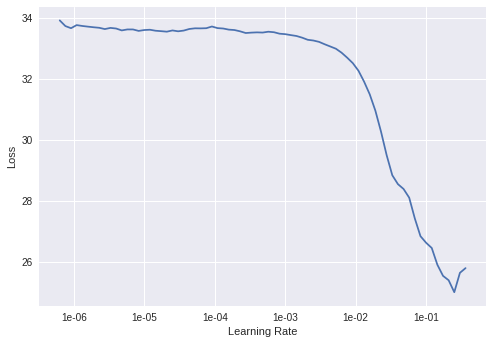

In [35]:
lr_find(learn)
learn.recorder.plot()

it looks like 1e-02 is a good learning rate to use, we can try ranges from 1e-02 to 1e-01

We are using the one-cycle-policy, where we increase the learning rate while decreasing momentum for first half of training, then decrease learning rate and increase the momentum

![Fast.ai one cycle policy](https://www.fast.ai/images/1cycle.png)

In [0]:
learn.save('stage-0')

In [50]:
learn.load('stage-0')

Learner(data=<fastai.tabular.data.TabularDataBunch object at 0x7f552c084cf8>, model=TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1117, 50)
    (1): Embedding(13, 6)
    (2): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=74, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5)
    (8): Linear(in_features=500, out_features=1, bias=True)
  )
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=MSELossFlat(), metrics=[<function exp_rmspe at 0x7f552ca50f28>], true_wd=True, bn_wd=True, 

In [0]:
lr = 8e-02

Fit the NN

Total time: 00:34
epoch  train_loss  valid_loss  exp_rmspe
1      14.756595   7.512108    16.303478  (00:01)
2      6.153358    2.551725    0.784608   (00:01)
3      3.039932    0.474777    0.491833   (00:01)
4      1.656167    0.336055    0.436428   (00:01)
5      0.963423    1.116545    1.884368   (00:01)
6      0.644854    0.110802    0.396469   (00:01)
7      0.441535    0.250689    0.651077   (00:01)
8      0.337680    0.072860    0.234423   (00:01)
9      0.384759    1.533162    0.707178   (00:01)
10     0.485946    0.026185    0.174524   (00:01)
11     0.503357    0.031473    0.158002   (00:01)
12     0.435500    0.258451    0.664514   (00:01)
13     0.345984    0.009747    0.089038   (00:01)
14     0.348359    0.409968    0.898624   (00:01)
15     0.276832    0.003033    0.052964   (00:01)
16     0.222120    0.020414    0.153816   (00:01)
17     0.170743    0.045546    0.238028   (00:01)
18     0.160932    0.003753    0.058364   (00:01)
19     0.158777    0.001946    0.041378  

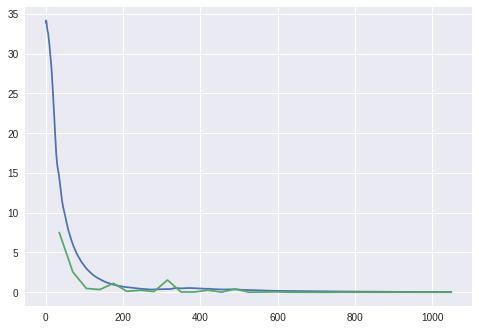

In [53]:
learn.fit_one_cycle(30, slice(lr), wd=5e-03)
learn.recorder.plot_losses()

saving 1st stage model

In [0]:
learn.save('stage1') 

In [55]:
learn.load('stage1')

Learner(data=<fastai.tabular.data.TabularDataBunch object at 0x7f552c084cf8>, model=TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1117, 50)
    (1): Embedding(13, 6)
    (2): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=74, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5)
    (8): Linear(in_features=500, out_features=1, bias=True)
  )
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=MSELossFlat(), metrics=[<function exp_rmspe at 0x7f552ca50f28>], true_wd=True, bn_wd=True, 

plotting training loss (blue) and val loss (green)

- should see loss increase a littel bit, then start to decrease
- if loss is always decreasing, means we can probably increase the lr 

2nd stage training, divide lr by 5

Total time: 00:23
epoch  train_loss  valid_loss  exp_rmspe
1      0.034130    0.004052    0.061176   (00:01)
2      0.036988    0.024686    0.169907   (00:01)
3      0.035582    0.000305    0.016096   (00:01)
4      0.035362    0.013114    0.107092   (00:01)
5      0.043953    0.000489    0.021018   (00:01)
6      0.054161    0.108649    0.390695   (00:01)
7      0.055289    0.005382    0.067248   (00:01)
8      0.055348    0.071366    0.305842   (00:01)
9      0.050813    0.041848    0.181137   (00:01)
10     0.049731    0.003802    0.063555   (00:01)
11     0.047975    0.001239    0.034278   (00:01)
12     0.041344    0.011194    0.099353   (00:01)
13     0.038381    0.000274    0.015656   (00:01)
14     0.031513    0.000183    0.013154   (00:01)
15     0.028341    0.000296    0.016355   (00:01)
16     0.028433    0.005709    0.078464   (00:01)
17     0.026450    0.000250    0.015364   (00:01)
18     0.025065    0.004060    0.061582   (00:01)
19     0.023540    0.000622    0.024409  

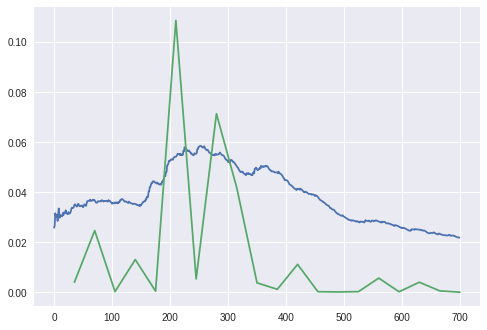

In [56]:
learn.fit_one_cycle(20, slice(lr/5))
learn.recorder.plot_losses()

saving model

In [0]:
learn.save('stage-2') #exp_rmspe = 0.008

## Results

After tuning the hyperparameters, the NN was able to achieve a validation Root Mean Square Percentage Error of 0.0083

# Tree-based Ensemble Classifiers

For ensemble classifiers, we mainly focus on Random Forests. GBM's are typically more prone to overfitting to noise, due to the nature of the boosting meta-algorithm.

By comparison, since Random Forests use bagging, they are typically more robust to variance in data.

Because financial data is typically noisy and unstructured, we can expect there to be noise in the data, which makes RF more attractive option to predict our data compared to GBMs

In the [Two Sigma Financial Modelling Challenge](http://blog.kaggle.com/2017/05/25/two-sigma-financial-modeling-challenge-winners-interview-2nd-place-nima-shahbazi-chahhou-mohamed/), the 2nd place solution did not use GMBs in the final model

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
valid_df

In [0]:
train_df_y = train_df['Log_Price']
valid_df_y = valid_df['Log_Price']

In [0]:
train_df_rf = train_df.drop(['Log_Price','Date'], axis = 1)
valid_df_rf = valid_df.drop(['Log_Price','Date'], axis = 1)

In [0]:
# defining function to evaluate exp_rmspe
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

In [51]:
m = RandomForestRegressor(n_estimators=100, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(train_df_rf, train_df_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.99, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

evaluating results from RandomForest

In [52]:
preds = m.predict(valid_df_rf)
exp_rmspe(preds, valid_df_y)

0.019083818358923334

## Results

Random Forest is able to produce a exp_rmspe of 0.019 after hyperparameter tuning

# Conclusion

The properly tuned NN obtained a lower validation RMSPE than Random Forest

However It should be noted that the validation RMSPE from RF is more stable when compared to NN, possibly due to the low sample size of the data. 

NN has an advantage over tree-based ensemble models in that it does not require as much manual feature engineering, due to the use of entity embedding.

